## Introduction 

In this notebook we gonna work on Iris .. benchmark dataset that is already available online .. 

References:

1. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
2. https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

## 1. KNN Mechanism: 

KNN is one of the most powerful supervised machine learning algorithms .. that is used in both (Classification and Regression) tasks.

The idea behind KNN is that it assumes some similarity between the data points and try to measure this similarity (i.e. distance, proximity, or closeness) using one of the similarity measure techniques (i.e. Euclidean distance) 


### How KNN works .. 
1. Load the data
2. Initialize K to your chosen number of neighbors (you can implement an algorithm to optimize the value of k or you can make run multiple experiements for different value of k to come up with the best k value for your dataset)
3. For each example in the data

    3.1 Calculate the distance between the query example and the current example from the data.
    
    3.2 Add the distance and the index of the example to an ordered collection


4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

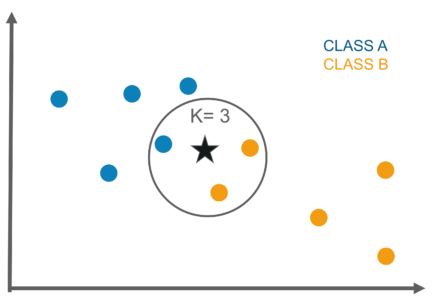

In [6]:
from IPython.display import Image
Image("KNN-Algorithm-k3-edureka-437x300.png")

## 2. Applications of KNN:

In fact, due to the disadvantage of KNN that it gets slower in large dataset sizes, limits its applicability in the industries that need fast and accurate predictions, for instance it's not the best option in Telecom industry .. meanwhile, it can be widly used in (Recommendation Systems)

## 3. Pros and Cons of KNN:

### 3.1. Pros:
1. It's simple and easy to implement.
3. The algorithm is versatile. It can be used for both (classification, and regression) ML tasks

### 3.2. Cons: 
1. It gets significantly slower as the number of examples, predictors/independent variables increase.
2. It's a parametric method, that depend on the value of K .. hence, choosing the wrong value of K will infleuence its results 

## 4. KNN Implementation in Python

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #splitting the dataset
from sklearn.preprocessing import StandardScaler  #scaling
from sklearn.neighbors import KNeighborsClassifier ##KNN
from sklearn.metrics import classification_report, confusion_matrix  ## model eval
import pandas as pd

%matplotlib inline

### Import the dataset .. 

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The first 3 columns will be treated as x .. 
and the predicted variable (y) will be the class type of the flower (entitled "Class" in the dataset) 

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### Splitting the data into training and testing sets:

This is an 80-20 split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Feature Scaling 

To guarantee that all the features are uniformly evaluated .. and have the same range of values .. 

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now X_train and X_test are scaled .. 

### Apply KNN algorithm:

### Model Fitting:

In [17]:
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

The model is fitted succesfully with the fitting paramters shown in the above output .. 

This is the basic version of KNN with number of neighbors = 5 .. 
and the distance measure is "minkowski" .. and there are many other techniques for measuring the similarity .. 

read more about them from .. 

https://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/

### Model Prediction:

In [19]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

now y_pred carries the predictions of each input row in X_test .. 

For instance, the first row in X_test is classified as 'Iris-versicolor' based on the values of each feature within this raw

### Model evaluation:

In [21]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  2,  8]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.78      1.00      0.88         7
 Iris-virginica       1.00      0.80      0.89        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.93      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30



KNN algorithm was able to classify all the 30 records in the test set with 100% accuracy (Support value) .. 

KNN is considered as a parametric method .. as its performance is highly depends on the value of K .. 

Here we choose k = 5 .. however, can we obtain better results by selecting another value for K ?! 

let's try different k values and compare their results .. 

### Choosing the best K value .. 

Let's plot the mean error for the predicted values of test set for all the K values between 1 and 50

In [36]:
error = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

"error" variable carries the mean error for each predicted value ...

Let's plot these mean error values .. 

Text(0, 0.5, 'Mean Error')

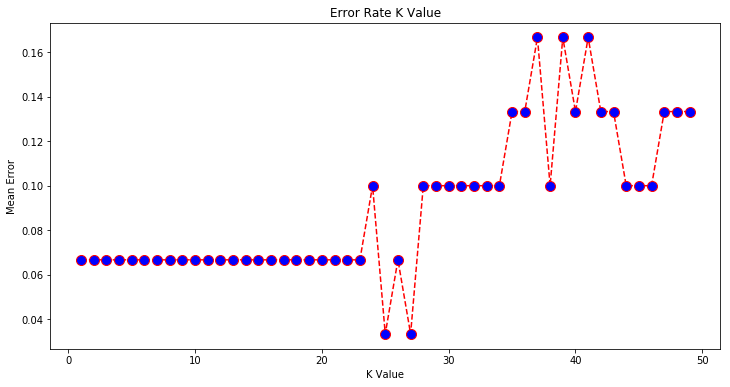

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

the above plot shows that smaller values of K yeilds better predictions (less mean error values) .. and the best results are if K about 25 and 27 .. 

However, this is a rule of thumb (don't take those optimal k values as standards) as optimal k value differs from dataset to another .. according to the size of the dataset and nature of its values! .. 

You can even think of build an optimization algorithm (i.e. Neural network to optimize K values) .. 

## Task: 

- You can try to apply KNN on the data in the txt file "entitled bezdekIris.data.txt" that we applied logistic regression on .. 
  to compare the performance of LR to KNN .. 
  
and you can read more about KNN through this link:

https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55